In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loandata/Loan payments data.csv


In [2]:
df=pd.read_csv("/kaggle/input/loandata/Loan payments data.csv")

In [3]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
df.tail(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
490,xqd20160491,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/17/2016 10:53,6.0,38,High School or Below,male
491,xqd20160492,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,11/9/2016 13:41,29.0,27,college,male
492,xqd20160493,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/25/2016 17:44,14.0,27,Bechalor,male
493,xqd20160494,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,9/29/2016 12:45,3.0,29,college,male
494,xqd20160495,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/13/2016 14:45,2.0,30,High School or Below,male
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [5]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [7]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [8]:
df['age'].describe()

count    500.000000
mean      31.116000
std        6.084784
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

In [9]:
print(df[['age','terms']].describe())

              age       terms
count  500.000000  500.000000
mean    31.116000   22.824000
std      6.084784    8.000064
min     18.000000    7.000000
25%     27.000000   15.000000
50%     30.000000   30.000000
75%     35.000000   30.000000
max     51.000000   30.000000


In [10]:
df.corr()

,Principal,terms,past_due_days,age
Principal,1.000000,0.534302,-0.093139,-0.092613
terms,0.534302,1.000000,-0.102613,-0.074259
past_due_days,-0.093139,-0.102613,1.000000,-0.053849
age,-0.092613,-0.074259,-0.053849,1.000000


In [11]:
df.corr()

,Principal,terms,past_due_days,age
Principal,1.000000,0.534302,-0.093139,-0.092613
terms,0.534302,1.000000,-0.102613,-0.074259
past_due_days,-0.093139,-0.102613,1.000000,-0.053849
age,-0.092613,-0.074259,-0.053849,1.000000


In [12]:
df.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

In [13]:
df.size

5500

In [14]:
print("Data columns\n")
for col in df.columns:
    print(col)

Data columns

Loan_ID
loan_status
Principal
terms
effective_date
due_date
paid_off_time
past_due_days
age
education
Gender


In [15]:
print("Rename data columns\n")
df=df.rename(columns={'Loan_ID':'Loan_Id','loan_status':'Loan_Status','terms':'Terms','effective_date':'Effective_Date',
                     'due_date':'Due_Date','paid_off_time':'Paid_Off_Time','past_due_days':'Past_Due_Days','age':'Age',
                     'education':'Education'})

for col in df.columns:
    print(col)

Rename data columns

Loan_Id
Loan_Status
Principal
Terms
Effective_Date
Due_Date
Paid_Off_Time
Past_Due_Days
Age
Education
Gender


In [16]:
print("Loan_Id values\n")
print(df.Loan_Id.unique())

Loan_Id values

['xqd20166231' 'xqd20168902' 'xqd20160003' 'xqd20160004' 'xqd20160005'
 'xqd20160706' 'xqd20160007' 'xqd20160008' 'xqd20160909' 'xqd20160010'
 'xqd20160011' 'xqd20160012' 'xqd20160013' 'xqd20160014' 'xqd20160015'
 'xqd20160016' 'xqd20160017' 'xqd20160018' 'xqd20160019' 'xqd20160020'
 'xqd20160021' 'xqd20160022' 'xqd20160023' 'xqd20160024' 'xqd20160025'
 'xqd20160026' 'xqd20160027' 'xqd20170088' 'xqd20160029' 'xqd20160030'
 'xqd88160031' 'xqd20160032' 'xqd20160033' 'xqd22169034' 'xqd20160035'
 'xqd20160036' 'xqd20160037' 'xqd20160038' 'xqd20160039' 'xqd20160040'
 'xqd20160041' 'xqd20160042' 'xqd20160043' 'xqd20160044' 'xqd20160045'
 'xqd20160046' 'xqd20160047' 'xqd20160048' 'xqd20160049' 'xqd20160050'
 'xqd20160051' 'xqd20160052' 'xqd20160053' 'xqd20160054' 'xqd20160055'
 'xqd20160056' 'xqd20160057' 'xqd20160058' 'xqd20160059' 'xqd20160060'
 'xqd20160061' 'xqd20160062' 'xqd20160063' 'xqd20160064' 'xqd20160065'
 'xqd20160066' 'xqd20160067' 'xqd20160068' 'xqd20160069' 'xqd

In [17]:
print("types of features in Loan_Status")
print(df.Loan_Status.unique())
loan_status=df.Loan_Status.unique().reshape(-1,1)
print(loan_status)

types of features in Loan_Status
['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']
[['PAIDOFF']
 ['COLLECTION']
 ['COLLECTION_PAIDOFF']]


In [18]:
paidoff_count=0
collection_count=0
collection_paidoff_count=0

print('Loan status with Loan_Id counts\n')
paidoff_count=len(df[df.Loan_Status==loan_status[0][0]].Loan_Id)
collection_count=len(df[df.Loan_Status==loan_status[1][0]].Loan_Id)
collection_paidoff_count=len(df[df.Loan_Status==loan_status[2][0]].Loan_Id)  
print(paidoff_count,collection_count,collection_paidoff_count)

Loan status with Loan_Id counts

300 100 100


In [19]:
df.Principal.unique
print("Principle coloumn\n")
print(df.Principal.value_counts())

Principle coloumn

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64


In [20]:
print("Loan_Status and Principle")
print(df.groupby('Loan_Status')['Principal'].value_counts())

Loan_Status and Principle
Loan_Status         Principal
COLLECTION          1000          77
                    800           23
COLLECTION_PAIDOFF  1000          80
                    800           19
                    500            1
PAIDOFF             1000         220
                    800           69
                    300            6
                    500            2
                    900            2
                    700            1
Name: Principal, dtype: int64


In [21]:
print("Total amount")
print(df.groupby('Loan_Status')['Principal'].sum())

Total amount
Loan_Status
COLLECTION             95400
COLLECTION_PAIDOFF     95700
PAIDOFF               280500
Name: Principal, dtype: int64


In [22]:
print("Unique Terms\n")
print(df.Terms.value_counts())
print(df.Terms.unique())

Unique Terms

30    272
15    207
7      21
Name: Terms, dtype: int64
[30 15  7]


In [23]:
print("relation of terms and principal\n")
print(df.groupby('Terms')['Principal'].value_counts())
print("Groupby sum of terms and principal\n")
print(df.groupby('Terms')['Principal'].sum())

relation of terms and principal

Terms  Principal
7      1000          11
       300            6
       800            2
       500            1
       900            1
15     800          103
       1000         100
       500            2
       700            1
       900            1
30     1000         266
       800            6
Name: Principal, dtype: int64
Groupby sum of terms and principal

Terms
7      15800
15    185000
30    270800
Name: Principal, dtype: int64


In [24]:
print("effective date\n")
print(df.Effective_Date.isnull().sum())
print("features of effective date\n")
print(df.Effective_Date.unique())
print(df.Effective_Date.value_counts())
print("Group by effective date and terms and principal")
print(df.groupby('Effective_Date')['Terms','Principal'].count())
print(df.groupby('Effective_Date')['Terms','Principal'].sum())
print(df.groupby('Effective_Date')['Terms','Principal'].mean())

effective date

0
features of effective date

['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']
9/11/2016    231
9/12/2016    148
9/10/2016     46
9/14/2016     33
9/13/2016     23
9/9/2016      15
9/8/2016       4
Name: Effective_Date, dtype: int64
Group by effective date and terms and principal
                Terms  Principal
Effective_Date                  
9/10/2016          46         46
9/11/2016         231        231
9/12/2016         148        148
9/13/2016          23         23
9/14/2016          33         33
9/8/2016            4          4
9/9/2016           15         15
                Terms  Principal
Effective_Date                  
9/10/2016        1026      43200
9/11/2016        5328     219000
9/12/2016        3335     139400
9/13/2016         441      20900
9/14/2016         840      31400
9/8/2016          105       4000
9/9/2016          337      13700
                    Terms    Principal
Effective_Date                    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


In [25]:
print('Age in Data state\n')
print('Data isnull sum\n')
print(df.Age.isnull().sum())
print('Data unique age\n')
print(df.Age.unique())
print('Data value counts age\n')
print(df.Age.value_counts())
print('Age group by Terms nad Principal in every Data\n')
print(df.groupby('Terms')['Age'].value_counts())
print('Group sum every Terms and Principal in Data')
print(df.groupby('Age')[['Terms','Principal']].sum())

Age in Data state

Data isnull sum

0
Data unique age

[45 50 33 27 28 35 29 36 26 39 40 32 43 25 34 31 37 24 21 30 22 44 46 38
 23 20 47 42 19 51 41 18 49]
Data value counts age

26    46
29    42
27    38
30    37
28    32
33    30
35    26
34    25
24    23
31    22
25    20
32    20
38    19
37    19
36    14
39    10
23    10
40     8
22     8
21     7
45     5
46     5
41     5
43     5
44     4
50     4
20     4
42     4
47     3
19     2
51     1
49     1
18     1
Name: Age, dtype: int64
Age group by Terms nad Principal in every Data

Terms  Age
7      29     4
       35     3
       25     2
       26     2
       27     2
             ..
30     44     2
       18     1
       46     1
       49     1
       50     1
Name: Age, Length: 72, dtype: int64
Group sum every Terms and Principal in Data
     Terms  Principal
Age                  
18      30       1000
19      60       2000
20     105       4000
21     195       6800
22     172       7300
23     202       8000
24     5

In [26]:
df_age=df.Age.value_counts().index
len(df_age)
count=0
df_age_list=[]
for age in df_age:
    df_age_list.append(sum(df[df.Age==int(age)].Principal))
    print(df_age_list[count],age)
    count=count+1

44100 26
39000 29
36600 27
36200 30
30500 28
27700 33
23000 35
24200 34
22200 24
21200 31
19400 25
19400 32
18000 38
17400 37
13200 36
9000 39
8000 23
7600 40
7300 22
6800 21
5000 45
4200 46
4600 41
4400 43
3600 44
3800 50
4000 20
3600 42
2800 47
2000 19
800 51
1000 49
1000 18


In [27]:
print("Education\n")
print(df.Education.unique())
print(df.Education.value_counts())
print(df.groupby(['Education','Terms'])['Principal'].sum())
print(df.groupby('Education')['Age'].count())

Education

['High School or Below' 'Bechalor' 'college' 'Master or Above']
college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: Education, dtype: int64
Education             Terms
Bechalor              7          3800
                      15        28500
                      30        31000
High School or Below  7          4900
                      15        70100
                      30       123800
Master or Above       7           600
                      15         1800
college               7          6500
                      15        84600
                      30       116000
Name: Principal, dtype: int64
Education
Bechalor                 67
High School or Below    209
Master or Above           4
college                 220
Name: Age, dtype: int64


In [28]:
print("Unique values of Gender\n")
print(df.Gender.unique())
print("null values\n")
print("null values in Gender column ",df.Gender.isnull().sum())
print("Gender and Principal\n")
print(df.groupby('Gender')['Principal'].sum())
print(df.groupby(['Gender','Terms'])['Principal'].sum())
print("Gender , Age , Principal")
print(df.groupby(['Gender','Age'])['Principal'].count())
print(df.groupby(['Gender','Age'])['Principal'].sum())

Unique values of Gender

['male' 'female']
null values

null values in Gender column  0
Gender and Principal

Gender
female     72800
male      398800
Name: Principal, dtype: int64
Gender  Terms
female  7          4700
        15        26500
        30        41600
male    7         11100
        15       158500
        30       229200
Name: Principal, dtype: int64
Gender , Age , Principal
Gender  Age
female  19      1
        21      1
        23      2
        24      3
        25      2
        26      8
        27      9
        28      2
        29      3
        30      5
        31      6
        32      4
        33      5
        34      4
        35      4
        36      2
        37      3
        38      3
        40      1
        42      1
        43      1
        44      2
        46      2
        47      1
        49      1
        50      1
male    18      1
        19      1
        20      4
        21      6
        22      8
        23      8
        24     20


In [29]:
print("due_date unique values\n")
print(df.Due_Date.unique())
print("paid_off unique values\n")
print(df.Paid_Off_Time.unique())
print("null values of due_date and paid_off_time\n")
print(df.Due_Date.isnull().sum())
print(df.Paid_Off_Time.isnull().sum())
print("Due_date vs Paid_Off_Time count\n")
print(df.groupby(['Due_Date','Paid_Off_Time']).count())
print("Due_date vs Paid_Off_Time sum\n")
print(df.groupby(['Due_Date','Paid_Off_Time']).sum())

due_date unique values

['10/7/2016' '9/22/2016' '10/8/2016' '9/15/2016' '9/24/2016' '9/16/2016'
 '10/9/2016' '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016'
 '9/18/2016' '9/26/2016' '10/26/2016' '10/11/2016' '11/10/2016'
 '9/19/2016' '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016'
 '11/12/2016' '9/23/2016' '11/7/2016']
paid_off unique values

['9/14/2016 19:31' '10/7/2016 9:00' '9/25/2016 16:58' '9/22/2016 20:00'
 '9/23/2016 21:36' '9/9/2016 13:45' '10/7/2016 23:07' '10/5/2016 20:33'
 '10/8/2016 16:00' '9/24/2016 13:00' '9/11/2016 19:11' '10/9/2016 16:00'
 '10/7/2016 23:32' '9/13/2016 21:57' '9/15/2016 14:27' '9/24/2016 16:00'
 '9/27/2016 14:21' '9/23/2016 18:49' '10/5/2016 22:05' '9/23/2016 7:42'
 '10/9/2016 9:00' '10/8/2016 17:09' '10/9/2016 23:00' '10/3/2016 12:50'
 '9/29/2016 12:18' '9/21/2016 20:16' '9/23/2016 8:21' '9/22/2016 19:17'
 '10/9/2016 17:33' '9/24/2016 14:41' '10/7/2016 21:48' '10/9/2016 17:44'
 '10/9/2016 7:24' '9/25/2016 21:49' '9/25/2016 9:00' '10/10

In [30]:
print("past_due_days\n")
print(df.Past_Due_Days.unique())
print("null values of past_due_days\n")
print(df.Past_Due_Days.isnull().sum())
print("past_due_days value counts")
print(df.Past_Due_Days.value_counts())

past_due_days

[nan 76. 61. 75. 60. 59. 74. 29. 44. 58. 73. 28.  2.  4. 13.  5.  3. 12.
 27.  1. 25. 24. 36.  7. 14. 23.  6. 38. 19. 52. 51.  9. 56.  8.]
null values of past_due_days

300
past_due_days value counts
59.0    40
74.0    25
2.0     22
1.0     18
3.0     14
60.0    13
4.0      8
75.0     7
29.0     7
5.0      5
27.0     3
76.0     3
7.0      3
44.0     3
14.0     3
28.0     2
58.0     2
13.0     2
61.0     2
12.0     2
25.0     2
24.0     2
6.0      2
56.0     1
73.0     1
36.0     1
23.0     1
38.0     1
19.0     1
52.0     1
51.0     1
9.0      1
8.0      1
Name: Past_Due_Days, dtype: int64


In [31]:
#Data Cleaning

df=df.drop(columns=['Loan_Id'],axis=1)
print(df)

            Loan_Status  Principal  Terms Effective_Date    Due_Date  \
0               PAIDOFF       1000     30       9/8/2016   10/7/2016   
1               PAIDOFF       1000     30       9/8/2016   10/7/2016   
2               PAIDOFF       1000     30       9/8/2016   10/7/2016   
3               PAIDOFF       1000     15       9/8/2016   9/22/2016   
4               PAIDOFF       1000     30       9/9/2016   10/8/2016   
..                  ...        ...    ...            ...         ...   
495  COLLECTION_PAIDOFF       1000     30      9/12/2016  10/11/2016   
496  COLLECTION_PAIDOFF       1000     15      9/12/2016   9/26/2016   
497  COLLECTION_PAIDOFF        800     15      9/12/2016   9/26/2016   
498  COLLECTION_PAIDOFF       1000     30      9/12/2016  11/10/2016   
499  COLLECTION_PAIDOFF       1000     30      9/12/2016  10/11/2016   

        Paid_Off_Time  Past_Due_Days  Age             Education  Gender  
0     9/14/2016 19:31            NaN   45  High School or Bel

In [32]:
df.corr()

,Principal,Terms,Past_Due_Days,Age
Principal,1.000000,0.534302,-0.093139,-0.092613
Terms,0.534302,1.000000,-0.102613,-0.074259
Past_Due_Days,-0.093139,-0.102613,1.000000,-0.053849
Age,-0.092613,-0.074259,-0.053849,1.000000


In [33]:
df=df.drop(['Past_Due_Days','Paid_Off_Time'],axis=1)
print(df)

            Loan_Status  Principal  Terms Effective_Date    Due_Date  Age  \
0               PAIDOFF       1000     30       9/8/2016   10/7/2016   45   
1               PAIDOFF       1000     30       9/8/2016   10/7/2016   50   
2               PAIDOFF       1000     30       9/8/2016   10/7/2016   33   
3               PAIDOFF       1000     15       9/8/2016   9/22/2016   27   
4               PAIDOFF       1000     30       9/9/2016   10/8/2016   28   
..                  ...        ...    ...            ...         ...  ...   
495  COLLECTION_PAIDOFF       1000     30      9/12/2016  10/11/2016   28   
496  COLLECTION_PAIDOFF       1000     15      9/12/2016   9/26/2016   26   
497  COLLECTION_PAIDOFF        800     15      9/12/2016   9/26/2016   30   
498  COLLECTION_PAIDOFF       1000     30      9/12/2016  11/10/2016   38   
499  COLLECTION_PAIDOFF       1000     30      9/12/2016  10/11/2016   28   

                Education  Gender  
0    High School or Below    male  
1  

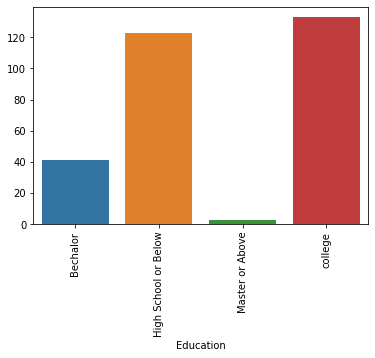

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=df[df['Loan_Status']=='PAIDOFF'].groupby('Education')['Gender'].count().index,
            y=df[df['Loan_Status']=='PAIDOFF'].groupby('Education')['Gender'].count().values)
plt.xticks(rotation=90)
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [36]:
df[df['Principal']==1000].Gender.value_counts()

male      320
female     57
Name: Gender, dtype: int64

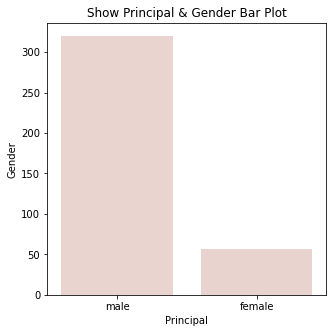

In [37]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x=df[df['Principal']==1000].Gender.value_counts().index,
              y=df[df['Principal']==1000].Gender.value_counts().values,
              palette=sns.cubehelix_palette(120))
plt.xlabel('Principal')
plt.ylabel('Gender')
plt.title('Show Principal & Gender Bar Plot')
plt.show()

In [38]:
le=LabelEncoder()
df['Principal']=le.fit_transform(df['Principal'])

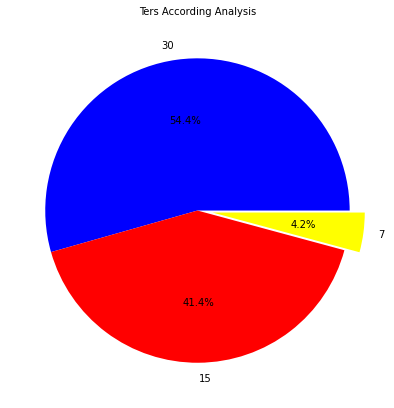

In [39]:
labels=df['Terms'].value_counts().index
colors=['blue','red','yellow']
explode=[0,0,0.1]
values=df['Terms'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Ters According Analysis',color='black',fontsize=10)
plt.show()